In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import scipy.stats as st
#import functions as fun

In [2]:
#mods = fun.models()
mods = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [3]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .05
mpl.rcParams['figure.subplot.top']    = .9
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .99
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,4

cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [4]:
#Get 1x1 degree grid
with xr.open_dataset('../rawdata/rsl_85_2090.nc') as ds:
    lon = ds['x'].values
    lat = ds['y'].values
    slr_md = ds['slr_md'].values

In [5]:
def get_mms(scen):
    mm = np.zeros((len(mods),len(lat),len(lon)))

    for m,model in enumerate(mods):
        with xr.open_dataset(f'../data/rsl/{model}_{scen}.nc') as ds:
            stdn = np.nanmean(ds['stdn'][-20:,:,:].values,axis=0)
            glac = np.nanmean(ds['glac'][-20:,:,:].values,axis=0)
            gsmb = np.nanmean(ds['gsmb'][-20:,:,:].values,axis=0)
            asmb = np.nanmean(ds['asmb'][-20:,:,:].values,axis=0)
            adyn = np.nanmean(ds['adyn'][-20:,:,:].values,axis=0)
            
            mm[m,:,:] = stdn+glac+gsmb+asmb+adyn

    mms = np.nanvar(mm,axis=0)
    mms[np.isnan(slr_md)]=np.nan
    return mms

In [6]:
def sig(var):
    return np.std(var,axis=0)

In [7]:
def get_vars(scen):
    stdn = np.zeros((len(mods),len(lat),len(lon)))
    adyn = np.zeros((len(mods),len(lat),len(lon)))
    asmb = np.zeros((len(mods),len(lat),len(lon)))
    gsmb = np.zeros((len(mods),len(lat),len(lon)))
    glac = np.zeros((len(mods),len(lat),len(lon)))
    
    for m,model in enumerate(mods):
        #Read RSL
        with xr.open_dataset(f'../data/rsl/{model}_{scen}.nc') as ds:
            stdn[m,:,:] = np.nanmean(ds['stdn'][-20:,:,:].values,axis=0)
            adyn[m,:,:] = np.nanmean(ds['adyn'][-20:,:,:].values,axis=0)
            asmb[m,:,:] = np.nanmean(ds['asmb'][-20:,:,:].values,axis=0)
            gsmb[m,:,:] = np.nanmean(ds['gsmb'][-20:,:,:].values,axis=0)
            glac[m,:,:] = np.nanmean(ds['glac'][-20:,:,:].values,axis=0)
                       
    return stdn,adyn,asmb,gsmb,glac

In [8]:
def plot_var(n,var1,var2,ylab='',xlab=''):
    var = np.zeros((len(lat),len(lon)))
    
    for j in range(len(lat)):
        for i in range(len(lon)):
            cov = st.spearmanr(var1[:,j,i],var2[:,j,i])[0]
            sig1 = np.nanstd(var1[:,j,i])
            sig2 = np.nanstd(var2[:,j,i])
            var[j,i] = 2*cov*sig1*sig2
            
    ax = fig.add_subplot(4,4,n,projection=ccrs.Robinson(central_longitude=200))
    
    var[np.isnan(slr_md)] = np.nan
    im = ax.pcolormesh(lon,lat,100.*var/vslr,transform=ccrs.PlateCarree(),vmin=-20,vmax=20,cmap=cmap)
    
    ax.text(-.01,.5,ylab,transform=ax.transAxes,rotation='vertical',va='bottom',ha='center',rotation_mode='anchor')
    ax.text(.5,-.01,xlab,transform=ax.transAxes,va='top',ha='center')
#    ax.text(.2,.7,scov,size=12,weight='bold',ha='center',transform=ax.transAxes,color='tab:orange')
    
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)
    print(ylab,xlab)
    return im

/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


glaciers 
Gr. SMB 
Ant. SMB 
Ant. dyn. sterodynamic
 
 
 glaciers
 
 Greenland SMB
 Antarctic SMB


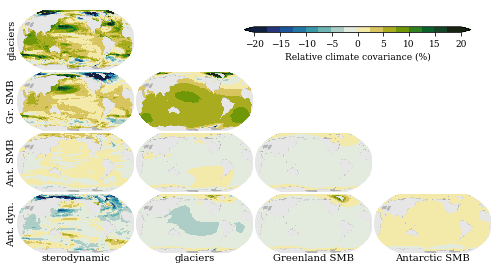

glaciers 
Gr. SMB 
Ant. SMB 
Ant. dyn. sterodynamic
 
 
 glaciers
 
 Greenland SMB
 Antarctic SMB


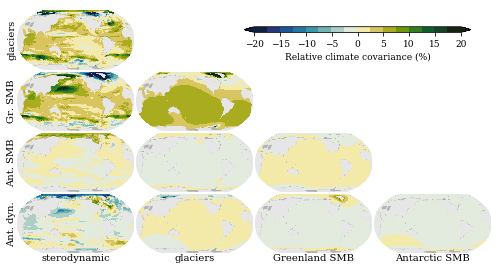

In [9]:
cmap = plt.get_cmap('cmo.delta',16)

for s,scen in enumerate(['rcp45','rcp85']):

    
    stdn,adyn,asmb,gsmb,glac = get_vars(scen)
    vslr = np.nanvar(stdn+adyn+asmb+gsmb+glac)
    
    fig = plt.figure()
    
    
    im = plot_var(1,glac,stdn,ylab='glaciers')
    im = plot_var(5,gsmb,stdn,ylab='Gr. SMB')
    im = plot_var(9,asmb,stdn,ylab='Ant. SMB')
    im = plot_var(13,adyn,stdn,ylab='Ant. dyn.',xlab='sterodynamic')
    im = plot_var(6,gsmb,glac)
    im = plot_var(10,asmb,glac)
    im = plot_var(14,adyn,glac,xlab='glaciers')
    im = plot_var(11,asmb,gsmb)
    im = plot_var(15,adyn,gsmb,xlab='Greenland SMB')
    im = plot_var(16,adyn,asmb,xlab='Antarctic SMB')

    cax = fig.add_axes([.5,.82,.45,.02])
    cb = plt.colorbar(im,cax=cax,extend='both',orientation='horizontal')
    cb.set_label('Relative climate covariance (%)')

    figname = f'draftplot_regvar_crossterms_{scen}.png'

    plt.savefig(f'../figures/{figname}',dpi=600)
    plt.savefig(f'../../../writing/codependence/figures/{figname}',dpi=600)
    plt.show()
    plt.close()